* * *
<pre> NYU Paris            <i> Artificial intelligence - Fall 2022 </i></pre>
* * *


<h1 align="center"> Lab 7: Unsupervised learning (I): similarity </h1>

<pre align="left"> October 13th 2022               <i> Author: Hicham Janati </i></pre>
* * *


##### Goals:
- Understand the difference between distance and similarity
- Apply this concept to face recognition 

In [148]:
import numpy as np
import matplotlib.pyplot as plt

# Part 1: Introduction 
To explain the notion of similarity, consider the following example. We want to aggregate documents based on their topics. For the sake of simplicity, we take documents made of only a few sentences. The following cell reads the documents.

In [142]:
with open("text/nfts.txt", "r") as docsfile:
    documents = docsfile.read().split('\n---\n')
print(f"Number of documents: {len(documents)}")
print(f"First document:\n\n {documents[0][:500]}")

Number of documents: 5
First document:

 The Manchester United and France midfielder, though, is far from alone as a footballer who has put his name to NFT schemes.

To their advocates, they are an exciting digital version of collectibles such as trading cards. Critics, though, say they are a vehicle for financial speculation, while lack of regulation means investors have little recourse if they lose huge sums of money buying and selling NFTs. And the figures are generally only going one way at the moment.

John Terry’s disastrous Ape 


### Question 1
The top 2 common themes of these articles are NFTs and football. We want to classify them based on the extent to which these themes are present. To do so, write a function that takes a document in argument (a string) and returns a vectors containing the number of times the words "nft", "nfts", "football", "footballer" are present, in that order. 

For example, `text_to_vec("a footballer bought two NFTs: 1 digital art NFT and 1 music NFT")` should return: `[2, 1, 0, 1]`.

*Hint: Check the documentation of these string and list methods: (`string.lower` `string.split` `list.count`)*

In [143]:
def text_to_vec(text, dictionary=["nft", "nfts", "football", "footballer", "footballers"]):
    text = text.lower()
    words = text.split(' ')
    rawcounts = [words.count(word) for word in dictionary]
    counts = [rawcounts[0] + rawcounts[1], rawcounts[2] + rawcounts[3] + rawcounts[4]]
    return counts

### Question 2
To make things simple, modify the function `text_to_vec` so that it aggregates the counts for ["nft, "nfts"] and ["football", "footballer", "footballers"]. The same example above should then return: `[3, 2]`. Then transform the list of documents to a list of vectors. 

In [144]:
vecs = []
for ii, doc in enumerate(documents):
    vec = text_to_vec(doc)
    vecs.append(vec)
    print(ii, vec)

0 [8, 3]
1 [22, 0]
2 [3, 0]
3 [22, 7]
4 [23, 5]


### Question 3
Print the vector of each documents. Intuitively, based only on these counts what documents do you consider similar / dissimilar ? Use the function below to visualize the vectors. Is this visualization in agreement with your intuition ? 

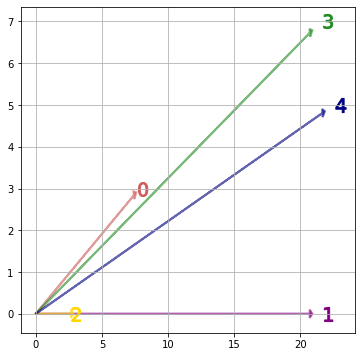

In [154]:

colors = ["indianred", "purple", "gold", "forestgreen", "navy"]
plt.figure(figsize=(6, 6))
for ii, vec in enumerate(vecs):
    plt.arrow(0,0,vec[0] * 0.95, vec[1] * 0.97, 
         shape='full', color=colors[ii], length_includes_head=True, 
         zorder=0, head_length=0.2, head_width=0.2, alpha=0.6, lw=2)
    plt.scatter(vec[0], vec[1], marker=rf"${ii}$", color=colors[ii], s=200)
plt.grid()
plt.show()

### Question 4 
Normalize the vectors by their norm so that their Euclidean norm $\|.\|_2$ is equal to 1. Visualize the new vectors. What to you observe ?

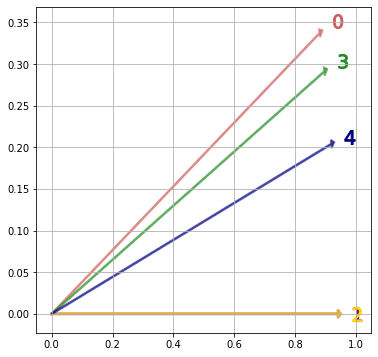

In [153]:
vectors = np.array(vecs).astype(float)
vectors /= np.linalg.norm(vectors, axis=1)[:, None]

colors = ["indianred", "purple", "gold", "forestgreen", "navy"]
plt.figure(figsize=(6, 6))
for ii, vec in enumerate(vectors):
    plt.arrow(0,0,vec[0] * 0.95, vec[1] * 0.97, 
         shape='full', color=colors[ii], length_includes_head=True, 
         zorder=0, head_length=0.01, head_width=0.01, alpha=0.6, lw=2)
    plt.scatter(vec[0], vec[1], marker=rf"${ii}$", color=colors[ii], s=200)
plt.grid()
plt.show()

### Question 5
Compute the Euclidean distance between two unit-norm vectors $x$ and $y$. Can you deduce from it a notion of similarity between two vectors $x$ and $y$ ?

# Part 2: Similarity for face recognition

In [163]:
from torchvision.models import resnet50, ResNet50_Weights
weights = ResNet50_Weights.DEFAULT
model = resnet50(weights=weights)
preprocess = weights.transforms()


Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /Users/hichamjanati/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth


In [ ]:
img_transformed = preprocess(img)